### Exercise 6: Build a PCA and t-SNE 
##### (15 points) --> your total will divided by 3 to get 5 points for this exercise.


---

In this Exercise, we will reinforce our knowledge of PCA and t-SNE using the Wine dataset.

##### 
**Dataset:**
You can find the dataset (win.data) under the datasets section on the Canvas.

**About Dataset**
The Wine dataset (https://archive.ics.uci.edu/ml/datasets/Wine) is a collection of attributes regarding the chemical analysis of wine from Italy from three different producers, but the same type of wine for each producer. This information could be used as an example to verify the validity of a bottle of wine made from the grapes from a specific region in Italy. The 13 attributes are Alcohol, Malic acid, Ash, Alkalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, and Proline.



To disable Python warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Step to do:

    1. Import pandas, numpy, and matplotlib, as well as the t-SNE and PCA models from scikit-learn (1 point)

In [1]:
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

# TSNE
from sklearn.manifold import TSNE

    2. Load the Wine dataset in datafram without header and display the first five rows of data. (1 point)

In [8]:
wine_df=pd.read_csv('wine.data',header=None)
wine_df.head

<bound method NDFrame.head of      0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065

WIN.DATA HAD DATA WITH NO COLUMN NAMES , COLUMN NAMES WERE GIVEN.

    3. The first column contains the labels; extract this column as labels and remove it from the dataset. (1 point)

In [ ]:
wine_df.columns=['Sr_no','Alcohol','Malic acid','Ash','Alkalinity of ash',' Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']

In [6]:
labels=wine_df['Sr_no']
wine_df1= wine_df.drop(wine_df.columns[0],axis=1)
labels

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Sr_no, Length: 178, dtype: int64

In [132]:
standardized_data = StandardScaler().fit_transform(wine_df1)

    4.Execute PCA to reduce the dataset to the first six components. (2 points)

In [135]:
no_comp = 6
pca = PCA(n_components=no_comp) 
principalComponents = pca.fit_transform(standardized_data)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4','principal component 5','principal component 6'])
print (principal_df.shape)


## Plot the first two principal components of each point to learn about the data:
'''
plt.scatter(principalComponents[:, 0], principalComponents[:, 3], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Wine attributes through PCA', fontsize=24)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component %d'% no_comp)
'''

(178, 6)


"\nplt.scatter(principalComponents[:, 0], principalComponents[:, 3], s= 5, c=y, cmap='Spectral')\nplt.gca().set_aspect('equal', 'datalim')\nplt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))\nplt.title('Visualizing Wine attributes through PCA', fontsize=24)\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component %d'% no_comp)\n"

    5. Determine the amount of variance within the data described by these six components. (1 point)

In [136]:
## Explaining the Variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823]


    6. Create a t-SNE model using a specified random state and a verbose value of 1 (1 point)

In [137]:
x_subset = standardized_data[0:10000]
y_subset = labels[0:10000]
print(np.unique(y_subset))

tsne = TSNE(random_state = 42, n_components=2,verbose=1, perplexity=40, n_iter=300)

[1 2 3]


    7. Fit the data to the t-SNE model. (1 point)

In [138]:
tsne_wine=tsne.fit_transform(x_subset)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.839161
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.185429
[t-SNE] KL divergence after 300 iterations: 0.351264


    8. Confirm that the shape of the t-SNE fitted data is two-dimensional ( 1 point)

Text(0.5, 1.0, 'Visualizing wineDATA through t-SNE')

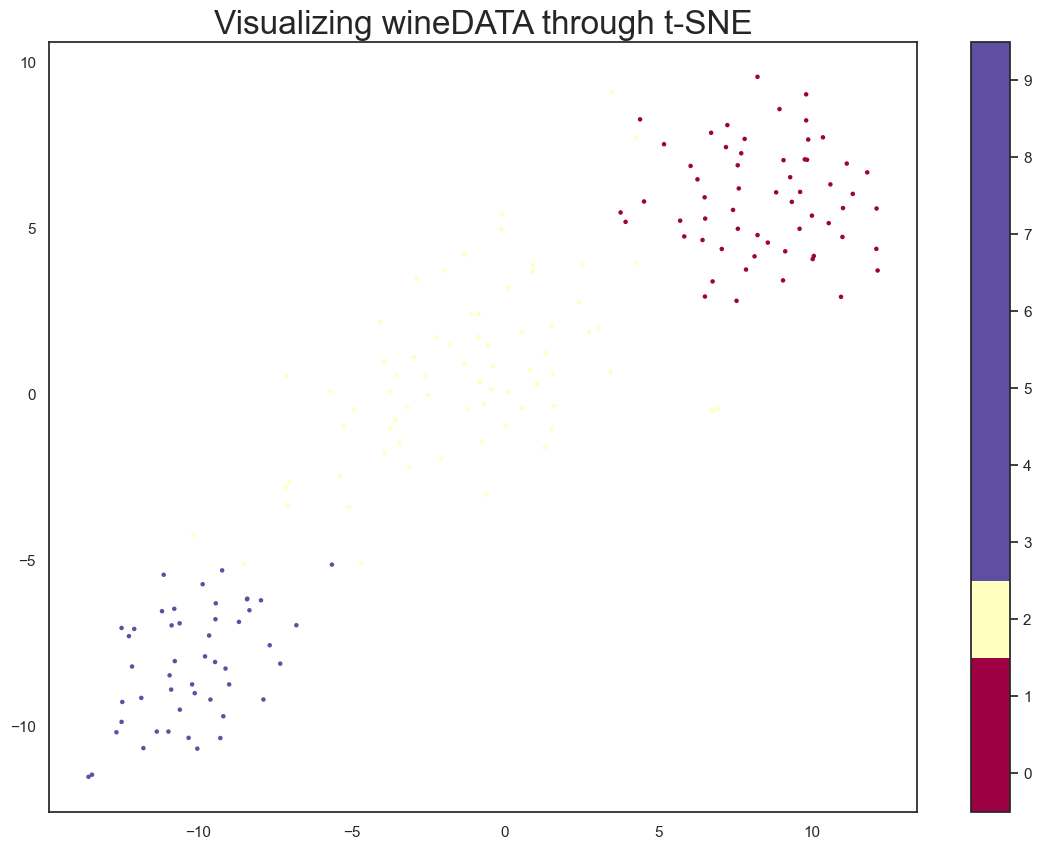

In [139]:
plt.scatter(tsne_wine[:, 0], tsne_wine[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing wineDATA through t-SNE', fontsize=24)

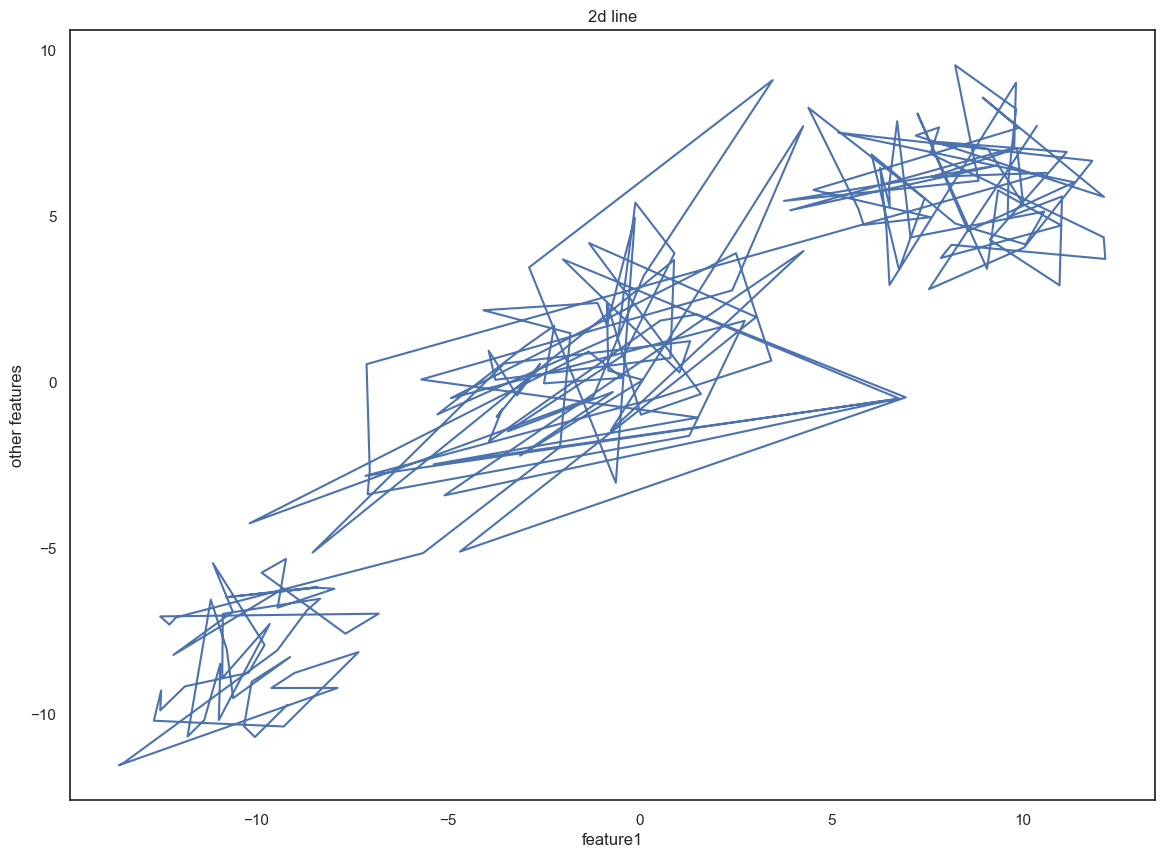

In [140]:
plt.plot(tsne_wine[:, 0], tsne_wine[:, 1],)
plt.xlabel('feature1')
plt.ylabel('other features')
plt.title('2d line')
plt.show()
# thus the above 2 graphs show that the fitted data is indeed 2D.

    9. Create a scatter plot of the two-dimensional data (first and second features) (2 points)

Text(0.5, 1.0, 'Visualizing wineDATA through t-SNE')

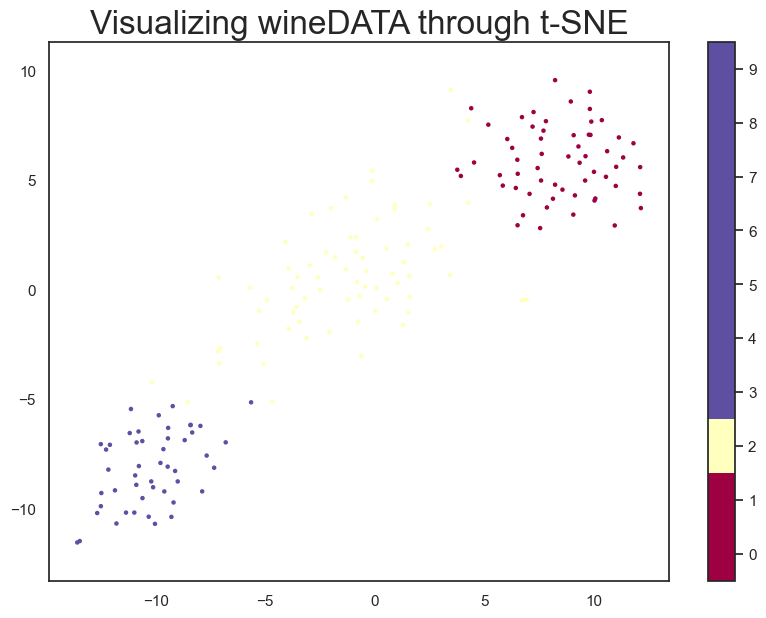

In [141]:
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine')
plt.scatter(tsne_wine[:, 0], tsne_wine[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing wineDATA through t-SNE', fontsize=24)
## write your code here:


    10. Create a secondary scatter plot of the two-dimensional data with the class labels applied to visualize any clustering that may be present (2 points)

posx and posy should be finite values
posx and posy should be finite values


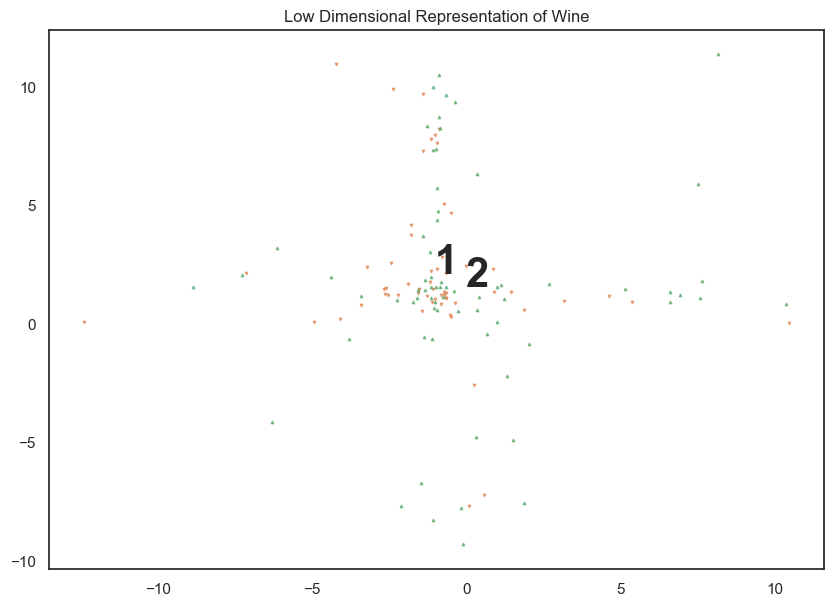

In [142]:
MARKER = ['o', 'v', '^',]
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine')
for i in range(3):
        selections = wine_tsne[labels == i]
        plt.scatter(selections[:,0], selections[:,1], alpha=0.7, marker=MARKER[i], s=3);
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30}) 
plt.show()
## write your code here:


    11. Construct a loop that iterates through the perplexity values (1, 5, 20, 30, 80, 160, 320). For each loop, generate a t-SNE model with the corresponding perplexity and print a scatter plot of the labeled wine classes. Note the effect of different perplexity values. (2 points)

1
[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.005s...
[t-SNE] Computed neighbors for 178 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 0.729617


posx and posy should be finite values
posx and posy should be finite values


[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.456497
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


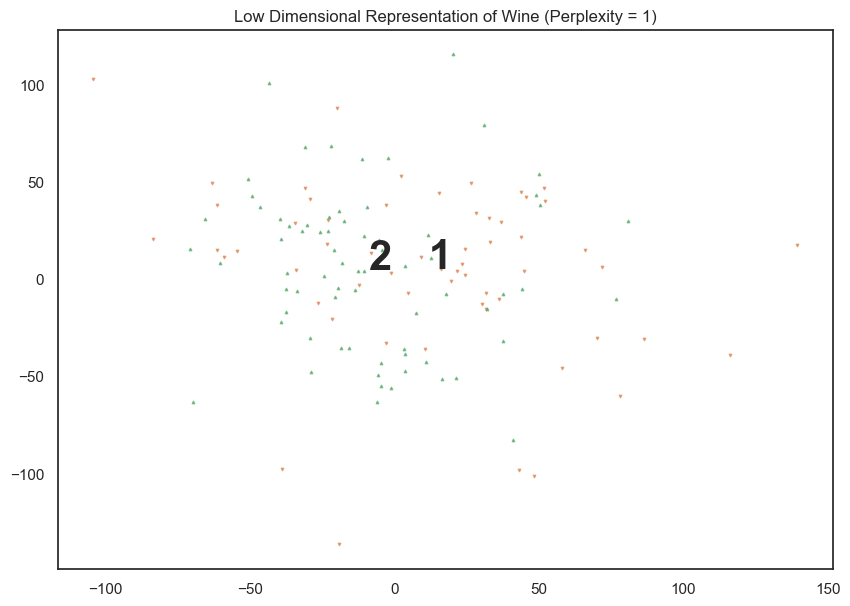

5
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 11.295299
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.953754


posx and posy should be finite values
posx and posy should be finite values


[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


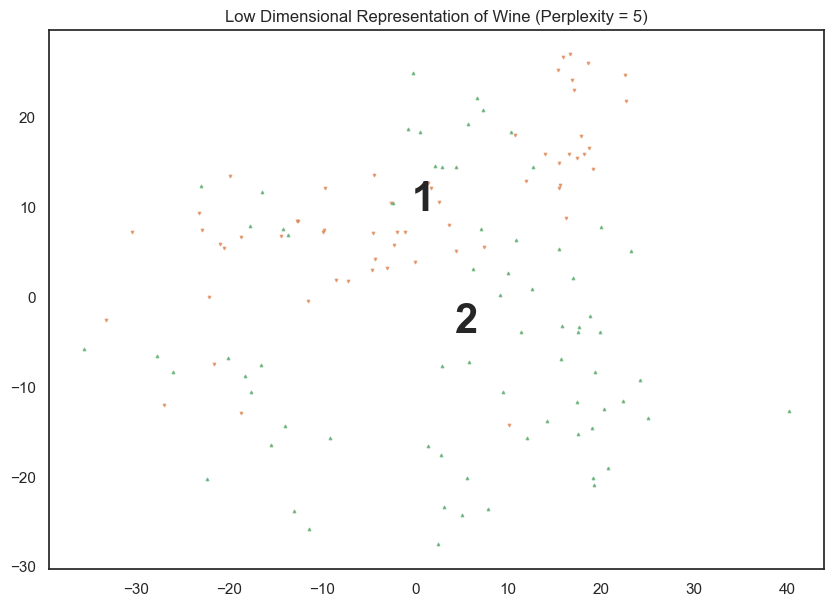

20
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 36.062312


posx and posy should be finite values
posx and posy should be finite values


[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.979607
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


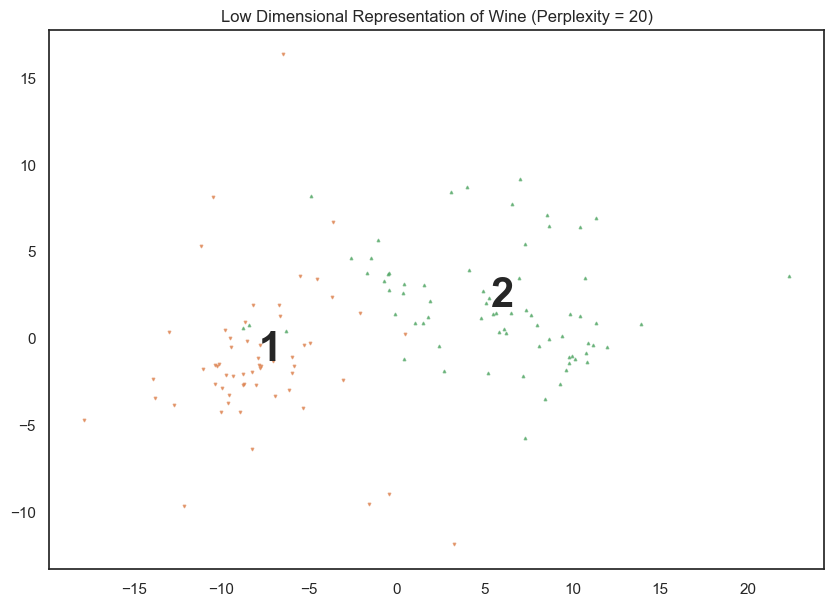

30
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.477115


posx and posy should be finite values


[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.368629
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


posx and posy should be finite values


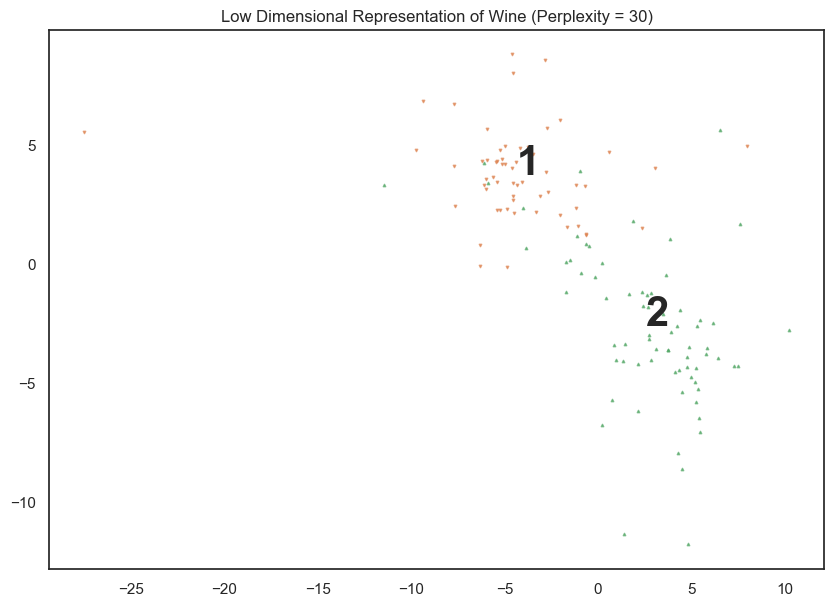

80
[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 150.912710


posx and posy should be finite values
posx and posy should be finite values


[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.591843
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


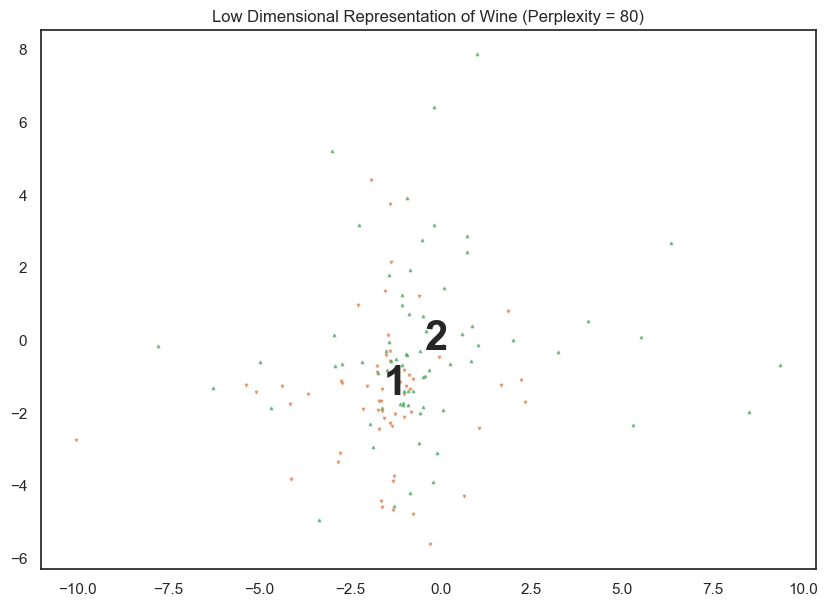

160
[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 544.542363


posx and posy should be finite values
posx and posy should be finite values


[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.778053
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


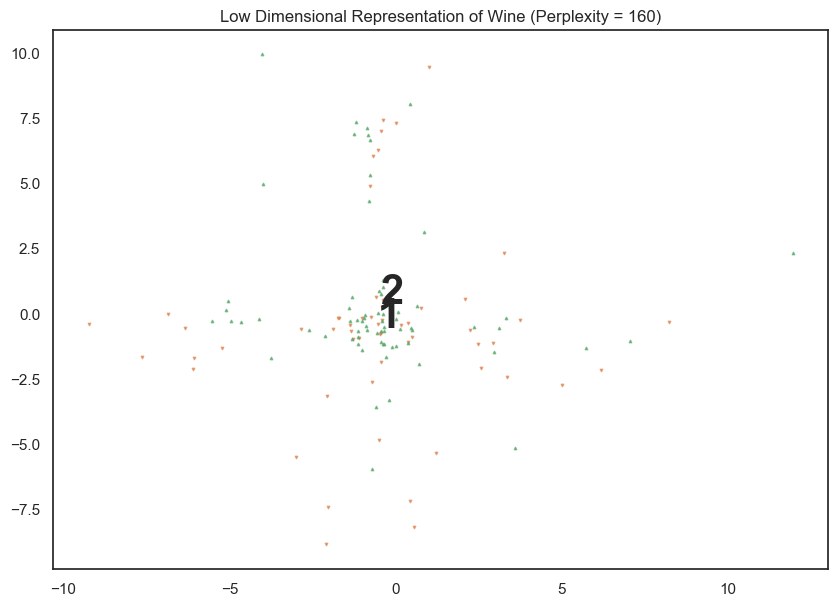

320
[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1125899906842624.000000


posx and posy should be finite values
posx and posy should be finite values


[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.126469
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


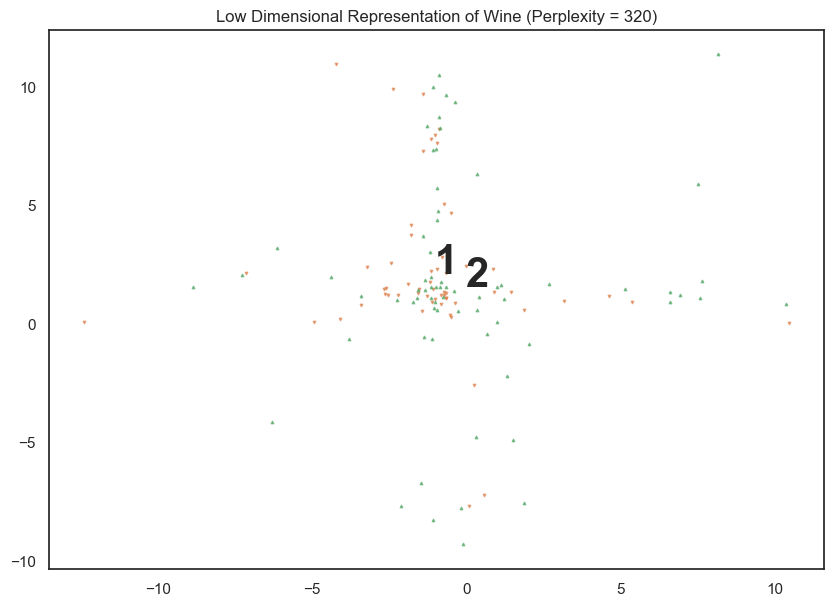

In [143]:
MARKER = ['o', 'v', '^',]
for prep in [1, 5, 20, 30, 80, 160, 320]:
    print(prep)
    model_tsne = TSNE(random_state=42, verbose=1,perplexity=prep, n_iter=250)
    wine_tsne = model_tsne.fit_transform(wine_df)
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of Wine (Perplexity = {prep})');
    for i in range(3):
        selections = wine_tsne[labels == i]
        plt.scatter(selections[:,0], selections[:,1], alpha=0.7, marker=MARKER[i], s=3);
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30}) 
    plt.show()
## write your code here:

#plt.show()
#N_ITER should be atleast 250.

Construct a loop that iterates through the iteration values (250, 500, 1000). For each loop, generate a t-SNE model with the corresponding number of iterations and identical number of iterations without progress values:

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.476623
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.164497
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.476623
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.164497
[t-SNE] KL diverg

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


[t-SNE] KL divergence after 1000 iterations: 0.103759


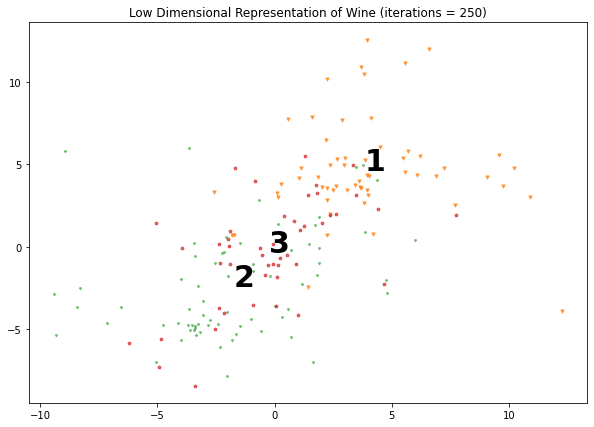

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


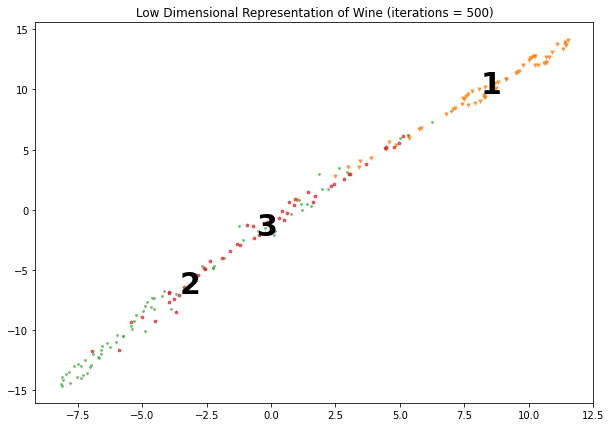

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


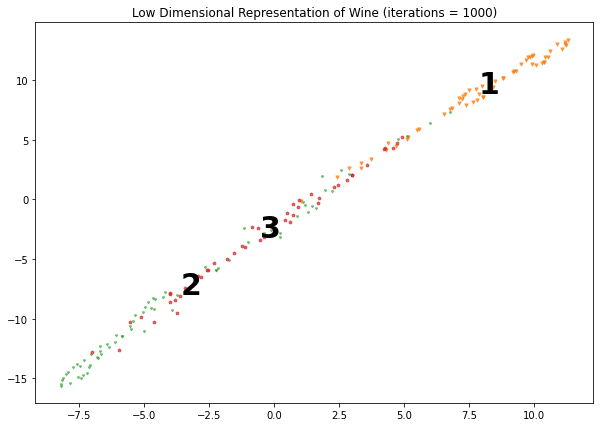

In [ ]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
for iterations in [250, 500, 1000]:
    model_tsne = TSNE(random_state=0, verbose=1, n_iter=iterations, n_iter_without_progress=iterations)
    wine_tsne = model_tsne.fit_transform(wine_pca)
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of Wine (iterations = {iterations})');
    for i in range(10):
        selections = wine_tsne[labels == i]
        plt.scatter(selections[:,0], selections[:,1], alpha=0.7, marker=MARKER[i], s=10);
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30}) 
plt.show()